In [ ]:
import twint
import pandas as pd

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer() 
# The SID module takes in a string and returns a score in each of these four categories - positive, negative, neutral, and compound.
import re
nltk.download('words')
words = set(nltk.corpus.words.words())

In [15]:
# Defining a function to scrap 'search_string' mentioned in tweets since a specific date 'since' within the limit 'limit' of tweets.
def twint_search(since, search_string,limit):
    c = twint.Config()
    c.Limit = limit
    c.Search = search_string
    c.Since = since
    c.Store_csv = True  #Stroing the tweets in a csv file
    c.Output = search_string+".csv"
    twint.run.Search(c) #searching in twitter
    df = pd.read_csv(search_string+".csv")
    return df  #returning the results as dataframe

In [ ]:
# calling the scraping function
df=twint_search('2019-09-24','#iPhone13',100)

In [31]:
# checking the dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2263 non-null   int64  
 1   conversation_id  2263 non-null   int64  
 2   created_at       2263 non-null   object 
 3   date             2263 non-null   object 
 4   time             2263 non-null   object 
 5   timezone         2263 non-null   int64  
 6   user_id          2263 non-null   int64  
 7   username         2263 non-null   object 
 8   name             2263 non-null   object 
 9   place            17 non-null     object 
 10  tweet            2263 non-null   object 
 11  language         2263 non-null   object 
 12  mentions         2263 non-null   object 
 13  urls             2263 non-null   object 
 14  photos           2263 non-null   object 
 15  replies_count    2263 non-null   int64  
 16  retweets_count   2263 non-null   int64  
 17  likes_count   

In [66]:
# prontong a tweet as an example
df['tweet'][50]

'Nature always inspires me …  #nature #colour #oakleaves #elanvalley #rivers #colour #streams #texture #iphone13 #landscape #midwales @ Elan Valley  https://t.co/819bnwtv2g'

In [37]:
# checking the sentiments in this tweet according to sid library
sentence = df['tweet'][50]
sid.polarity_scores(sentence)['compound']

0.4404

In [62]:
# Defining a function to clean the collected dataset
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split()) 
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) # splitting the tweet into tokens
         if w.lower() in words or not w.isalpha())
    return tweet
# Cleaning the collected data
df['tweet_clean'] = df['tweet'].apply(cleaner)

In [ ]:
# finding sentements for the collected tweets
list1 = []
for i in df['tweet_clean']:
    list1.append((sid.polarity_scores(str(i)))['compound'])
df['sentiment'] = pd.Series(list1)
def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)
df['sentiment_category'] = df['sentiment'].apply(sentiment_category)

In [63]:
# printing some colomns of our collected data
df = df[['tweet','date','id','sentiment','sentiment_category','tweet_clean']]
df.head()

,tweet,date,id,sentiment,sentiment_category,tweet_clean
0,Trendy Girl in Spring in Paris by DaDo ART for...,2022-03-13,1503072153910063106,0.0000,neutral,Girl in Spring in by DaDo ART for Galaxy S21 |...
1,#iPhone12 、Apple公式よりも #楽天モバイル が安いって知ってた？ ソフトバン...,2022-03-13,1503069180316327942,0.0000,neutral,iPhone12 、 ？ 、 、 auよりもなんと1 . 5万円以上安く買える ！ 🙆‍♀️...
2,"#BONPLAN #PROMO Apple Watch Series 7, AirPods...",2022-03-13,1503068374363951113,0.0000,neutral,"Apple Watch Series 7 , Pro , pour , Apple Watc..."
3,Anker Foldable 3-in-1 Station with Power Adapt...,2022-03-13,1503066862204198913,0.0000,neutral,Anker Foldable 3 - in - 1 Station with Power A...
4,#wallpapers #homescreen #lockscreen 🚦#wallpa...,2022-03-13,1503064755807870994,0.6688,positive,🚦 wallpaper 🚦 iPhone13ProMax 🚦 iPhone13 🚦 andr...


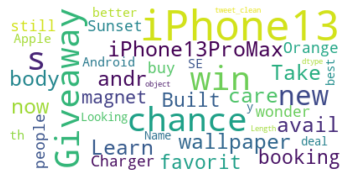

In [65]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# plotting a word cloud of positive mentions of iPhone13 in the tweets
positive = df[df['sentiment_category']=='positive']
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(positive['tweet_clean']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()